In [1]:
import random
random.seed(112358)

import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_absolute_error


# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import backend as K

%matplotlib inline

In [3]:
import json
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, SimpleRNN, Embedding, Dense, \
                            TimeDistributed, GRU, Dropout, Bidirectional, \
                            Conv1D, BatchNormalization
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

plt.style.use("tableau-colorblind10")

print(f"Using TensorFlow version: {tf.__version__}")
print(f"Using TensorFlow Keras version: {tf.keras.__version__}")

Using TensorFlow version: 2.7.0
Using TensorFlow Keras version: 2.7.0


In [4]:
devices = tf.config.experimental.get_visible_devices()
print(f"Devices: {devices}\n")
print(
    f"Logical Devices: {tf.config.experimental.list_logical_devices('GPU')}\n"
)

print(f"GPU Available: {tf.config.list_physical_devices('GPU')}\n")
print(f"All Pysical Devices: {tf.config.list_physical_devices()}")

# Set seed for repeatable results
np.random.seed(123)
tf.random.set_seed(456)

Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

Logical Devices: []

GPU Available: []

All Pysical Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [4]:
data = pd.read_csv('data/prelimdata.csv')

In [5]:
hikarudata1 = pd.read_csv('data/hikarudata1.csv')

In [14]:
hikarus = ["hikarudata1", "hikarudata2", "hikarudata3", "hikarudata4", "hikarudata5", "hikarudata6", "hikarudata7",
           "hikarudata8", "hikarudata9", "hikarudata10", "hikarudata11", "hikarudata12", "hikarudata13", "hikarudata14", 
           "hikarudata15"]

In [16]:
test = ['x', 'y']

In [17]:
test = [5, 6]

In [20]:
hikarudata1 = pd.read_csv('data/' + hikarus[0] + '.csv')

In [24]:
for hikaru in hikarus:
    vars()[hikaru] = pd.read_csv('data/' + hikaru + '.csv')

In [22]:
vars()[hikarus[0]] = 5

In [42]:
hikarudata = pd.concat([hikarudata1, hikarudata2, hikarudata3, hikarudata4, hikarudata5, hikarudata6, hikarudata7,
                      hikarudata8, hikarudata9, hikarudata10, hikarudata11, hikarudata12, hikarudata13, hikarudata14,
                      hikarudata15])

In [41]:
print([[vars()[hikaru]] for hikaru in hikarus])

KeyError: 'hikarudata1'

In [44]:
hikarudata.shape

(240317, 777)

In [46]:
data = hikarudata

In [45]:
hikarudata.describe()

,Unnamed: 0,ID,rating,opprating,movetime,timeleft,wcl14,0,1,2,...,758,759,760,761,762,763,764,765,766,767
count,240317.000000,2.403170e+05,240317.000000,240317.000000,240317.000000,240317.000000,240317.000000,240317.0,240317.000000,240317.000000,...,240317.000000,240317.000000,240317.000000,240317.000000,240317.0,240317.000000,240317.000000,240317.000000,240317.000000,240317.000000
mean,16.606836,6.151880e+09,1193.400155,1192.906149,5.533738,119.934086,0.056968,0.0,0.000308,0.001640,...,0.000920,0.002622,0.002505,0.000295,0.0,0.000246,0.000666,0.202237,0.000670,0.038220
std,13.606766,6.407107e+07,475.694459,479.292889,6.949173,75.693938,0.129038,0.0,0.017545,0.040458,...,0.030311,0.051134,0.049988,0.017186,0.0,0.015667,0.025794,0.401669,0.025875,0.191728
min,0.000000,6.112380e+09,100.000000,100.000000,0.100000,0.200000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.115252e+09,853.000000,854.000000,1.500000,58.900000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.000000,6.121343e+09,1136.000000,1135.000000,3.200000,117.100000,0.003707,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,24.000000,6.155298e+09,1468.000000,1465.000000,6.900000,164.400000,0.047871,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,91.000000,6.412876e+09,3064.000000,3229.000000,181.000000,533.100000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [47]:
data[data['movetime']<=0]

,Unnamed: 0,ID,username,rating,opprating,inc,movetime,timeleft,wcl14,0,...,758,759,760,761,762,763,764,765,766,767


In [7]:
data.head() #rating = y

,Unnamed: 0,ID,username,rating,opprating,inc,movetime,timeleft,wcl14,0,...,758,759,760,761,762,763,764,765,766,767
0,0,6115163991,1977Ivan,2683,2596,False,1.2,165.9,0.071325,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6115163991,1977Ivan,2683,2596,False,0.1,164.7,0.045871,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6115163991,1977Ivan,2683,2596,False,0.9,164.6,0.027956,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6115163991,1977Ivan,2683,2596,False,0.4,163.7,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6115163991,1977Ivan,2683,2596,False,1.1,163.3,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
response = 'rating'
X_data2  = data.drop(columns=response)
X_data2 =  X_data2.drop(columns='username')
y_data = data[response]

In [49]:
X_data = X_data2.drop(columns='opprating') #can change to +- player rating or some other log function if needed

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=111)

In [7]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data, test_size=0.2, random_state=111)

In [51]:
print(
    "The shapes of our resulting X and y train and test sets are:\n\n"
    "\tX_train\t{}\n\ty_train\t{}\n\n\tX_test\t{}\n\ty_test\t{}\n"
    .format(
        X_train.shape, y_train.shape, X_test.shape, y_test.shape,
    )
)

The shapes of our resulting X and y train and test sets are:

	X_train	(192253, 774)
	y_train	(192253,)

	X_test	(48064, 774)
	y_test	(48064,)



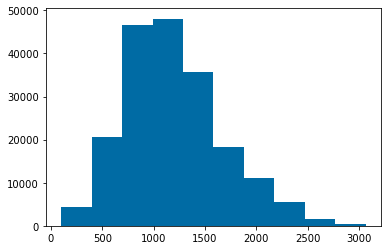

In [52]:
plt.hist(y_train)
plt.show()

In [53]:
X_train.head()

,Unnamed: 0,ID,inc,movetime,timeleft,wcl14,0,1,2,3,...,758,759,760,761,762,763,764,765,766,767
8505,15,6288667229,False,5.1,64.4,0.013161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,24,6183522507,False,0.6,67.2,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,16,6120219298,False,3.7,64.5,0.000218,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12069,74,6171627506,False,2.0,22.6,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247,23,6112530868,False,4.2,100.1,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


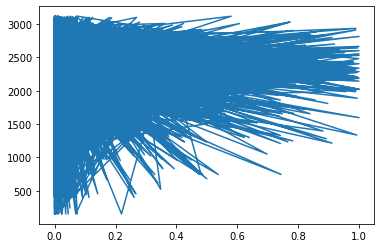

In [21]:
X_train.head()

,Unnamed: 0,ID,inc,movetime,timeleft,wcl14,0,1,2,3,...,758,759,760,761,762,763,764,765,766,767
74202,39,6179431028,False,1.7,73.9,0.000626,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38731,31,6129342804,False,1.9,19.3,0.000013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94319,24,6155342840,False,4.8,55.6,0.030385,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98964,7,6119584787,False,3.8,119.4,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77600,17,6116620673,False,1.5,91.0,0.011620,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
X_train.drop(['Unnamed: 0', 'ID', 'inc', 'movetime', 'timeleft', 'wcl14'], axis=1)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
74202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94319,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98964,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77600,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105747,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4820,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10196,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [60]:
linreg = LinearRegression().fit(X_train[['movetime', 'wcl14']], y_train)

In [61]:
linregtestpreds = linreg.predict(X_test[['movetime', 'wcl14']])
linregtrainpreds = linreg.predict(X_train[['movetime', 'wcl14']])

In [62]:
trainmse = mean_absolute_error(y_train, linregtrainpreds)
testmse = mean_absolute_error(y_test, linregtestpreds)
trainr2 = r2_score(y_train, linregtrainpreds)
testr2 = r2_score(y_test, linregtestpreds)

In [63]:
print('Train MSE: ' + str(trainmse))
print('Test MSE: ' + str(testmse))
print('Train r^2: ' + str(trainr2))
print('Test r^2: ' + str(testr2))

Train MSE: 216.67320156602756
Test MSE: 215.28453873440816
Train r^2: 0.014108784620841974
Test r^2: 0.012485397830404033


In [37]:
testmse/X_test.shape[0]

4.191616678061387

In [ ]:
data

In [71]:
linreg = LinearRegression().fit(X_train2[['opprating']], y_train2)

In [72]:
linregtestpreds = linreg.predict(X_test2[['opprating']])
linregtrainpreds = linreg.predict(X_train2[['opprating']])

In [73]:
trainmse = mean_absolute_error(y_train2, linregtrainpreds)
testmse = mean_absolute_error(y_test2, linregtestpreds)
trainr2 = r2_score(y_train2, linregtrainpreds)
testr2 = r2_score(y_test2, linregtestpreds)

In [74]:
print('Train MSE: ' + str(trainmse))
print('Test MSE: ' + str(testmse))
print('Train r^2: ' + str(trainr2))
print('Test r^2: ' + str(testr2))

Train MSE: 144.34407349199907
Test MSE: 143.01746106986792
Train r^2: 0.38292830511831877
Test r^2: 0.39995445269863306


In [75]:
X_train.head()

,opprating,inc,movetime,timeleft,wcl14,0,1,2,3,4,...,758,759,760,761,762,763,764,765,766,767
25914,2533,False,8.9,76.1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46145,2198,True,28.2,184.2,0.067224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83085,2438,False,3.7,139.2,0.001921,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17642,2722,True,2.8,89.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41928,2511,False,0.1,7.3,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
linreg.predict(testpoint)

array([2427.43332291])

In [113]:
testpoint = pd.DataFrame([2500, False, 20, 150, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]).T

In [12]:
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler = StandardScaler().fit(X_train)
X_train_std[X_train.columns] = scaler.transform(X_train)
X_test_std[X_test.columns] = scaler.transform(X_test)

#can unscale binary vars

In [13]:
X_train_std

,move,rating,inc,movetime,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
24950,-0.891946,0.255198,1.755632,-0.501447,0.0,-0.012088,-0.047021,1.330081,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,2.536420,-0.018729,-0.232875
22297,0.220723,1.147958,-0.569595,-0.277352,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
80591,-1.022849,-0.155539,1.755632,0.779097,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
74389,0.220723,1.341446,-0.569595,1.387355,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
59793,1.660648,-0.131778,-0.569595,-0.693528,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
61961,-0.564691,-0.009575,-0.569595,-0.581481,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
59072,-0.499240,-0.739398,1.755632,0.058791,0.0,-0.012088,-0.047021,1.330081,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
59418,0.482528,0.750799,-0.569595,0.987185,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,4.294141
4250,2.118806,0.750799,-0.569595,-0.693528,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875
61074,0.809783,-0.549304,-0.569595,-0.693528,0.0,-0.012088,-0.047021,-0.751834,-0.045272,-0.049751,...,-0.012088,-0.051062,-0.035879,-0.007645,0.0,-0.021627,-0.049455,-0.394256,-0.018729,-0.232875


In [14]:
nodes = 772

NN_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(nodes, activation="relu"),
        tf.keras.layers.Dense(nodes, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 772)               596756    
_________________________________________________________________
dense_1 (Dense)              (None, 772)               596756    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 773       
Total params: 1,194,285
Trainable params: 1,194,285
Non-trainable params: 0
_________________________________________________________________


In [15]:
batch_size = 128
epochs = 15
validation_split = 0.2
verbose = 1

# compile our model
NN_model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
)

# fit out model
history_NN = NN_model.fit(
    X_train_std.values, y_train.values,
    batch_size=batch_size,
    validation_split=validation_split,
    epochs=epochs,
    verbose=verbose,
)

Train on 54757 samples, validate on 13690 samples
Epoch 1/15
54757/54757 [==============================] - 8s 146us/sample - loss: 5365.7045 - val_loss: 5113.2965
Epoch 2/15
54757/54757 [==============================] - 7s 130us/sample - loss: 5009.7037 - val_loss: 5122.9409
Epoch 3/15
54757/54757 [==============================] - 7s 130us/sample - loss: 4786.6062 - val_loss: 5115.2900
Epoch 4/15
54757/54757 [==============================] - 7s 130us/sample - loss: 4415.2302 - val_loss: 5189.8834
Epoch 5/15
54757/54757 [==============================] - 7s 135us/sample - loss: 3630.3311 - val_loss: 5560.6944
Epoch 6/15
54757/54757 [==============================] - 7s 130us/sample - loss: 2860.9519 - val_loss: 5569.6277
Epoch 7/15
54757/54757 [==============================] - 7s 130us/sample - loss: 2299.8086 - val_loss: 5716.8821
Epoch 8/15
54757/54757 [==============================] - 7s 130us/sample - loss: 1939.1223 - val_loss: 5630.5503
Epoch 9/15
54757/54757 [==============

In [43]:
history_NN.history

{'loss': [620405.5819046252,
  57634.46894154229,
  40556.23735885081,
  31467.730617846235,
  25916.462440340107,
  22225.55844408306,
  19743.916109309514,
  18056.71982199479,
  16750.956244214496,
  15244.65170780819,
  13828.866089966237,
  12940.751382279035,
  12121.717220640026,
  11460.944430816922,
  10943.383453595972],
 'val_loss': [74189.95875467951,
  58284.32519402849,
  50778.8003652301,
  44859.79708215394,
  42207.15086913349,
  39763.39867432889,
  38479.36889067065,
  36869.590130227356,
  36714.01540015522,
  35801.086646274656,
  34452.4602909286,
  33917.64150183756,
  34540.62343521731,
  33505.76488883309,
  34871.69974918965]}

In [16]:

print("Evaluate model on full training and test sets:\n")
nn_acc_train = NN_model.evaluate(X_train_std, y_train)
nn_acc_test = NN_model.evaluate(X_test_std, y_test)

print(
    "\nThe resulting accuracy scores are:\n\n"
    "\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(nn_acc_train, nn_acc_test)
)


Evaluate model on full training and test sets:

17112/17112 [==============================] - 2s 99us/sample - loss: 6104.1904

The resulting accuracy scores are:

	Train	1917.3415
	TEST	6104.1904


In [17]:
X_train.head()

,move,rating,inc,movetime,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
24950,15,2464,1,1.3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22297,32,2727,0,2.7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
80591,13,2343,1,9.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74389,32,2784,0,13.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59793,54,2350,0,0.1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
predtest = np.array([23, 2500, 0, .1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
predtest = pd.DataFrame(predtest).transpose()
predtest[predtest.columns] = scaler.transform(predtest)

In [46]:
NN_model.predict(predtest)

array([[26.639477]], dtype=float32)

In [22]:
X_test[99:100]

,move,rating,inc,movetime,0,1,2,3,4,5,...,758,759,760,761,762,763,764,765,766,767
74873,23,2274,0,1.2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
prelimdata = pd.read_csv('data/prelimdata.csv')

In [12]:
prelimdata.head()

,username,rating,opprating,inc,movetime,timeleft,wcl14,0,1,2,...,758,759,760,761,762,763,764,765,766,767
0,1977Ivan,2683,2596,False,1.2,165.9,0.052877,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1977Ivan,2683,2596,False,0.1,164.7,0.037854,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1977Ivan,2683,2596,False,0.9,164.6,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1977Ivan,2683,2596,False,0.4,163.7,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1977Ivan,2683,2596,False,1.1,163.3,0.006000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
prelimdata.describe()

,rating,opprating,movetime,timeleft,wcl14,0,1,2,3,4,...,758,759,760,761,762,763,764,765,766,767
count,107294.000000,107294.000000,107294.000000,107294.000000,107294.000000,107294.0,107294.000000,107294.000000,107294.000000,107294.000000,...,107294.000000,107294.000000,107294.000000,107294.000000,107294.0,107294.000000,107294.000000,107294.000000,107294.000000,107294.000000
mean,2377.119867,2364.013663,4.486812,92.503502,0.040614,0.0,0.000224,0.002656,0.360309,0.002749,...,0.000168,0.002330,0.001286,0.000037,0.0,0.000382,0.002106,0.133344,0.000363,0.051587
std,301.770478,318.646653,6.372720,63.394793,0.086529,0.0,0.014954,0.051471,0.480092,0.052363,...,0.012951,0.048215,0.035841,0.006106,0.0,0.019544,0.045847,0.339948,0.019062,0.221193
min,153.000000,400.000000,0.100000,0.200000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2229.000000,2215.000000,1.100000,34.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2405.000000,2398.000000,2.300000,89.600000,0.006609,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2562.000000,2555.000000,5.300000,142.900000,0.041046,0.0,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,3118.000000,3249.000000,128.900000,422.600000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


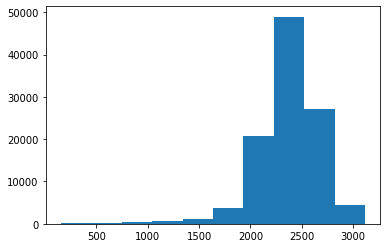

In [18]:
plt.hist(prelimdata['rating'])
plt.show()

In [19]:
#add feature for difference in rating between players? ie 200 pt difference = 2, -500 pt diff = -5

In [34]:
response = 'rating'
X_data = prelimdata.drop(columns=[response,'username'])
y_data = prelimdata[response]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=111)

In [38]:
X_train.head()

,opprating,inc,movetime,timeleft,wcl14,0,1,2,3,4,...,758,759,760,761,762,763,764,765,766,767
25914,2533,False,8.9,76.1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46145,2198,True,28.2,184.2,0.067224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83085,2438,False,3.7,139.2,0.001921,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17642,2722,True,2.8,89.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41928,2511,False,0.1,7.3,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
X_train_std = X_train.copy()
X_test_std = X_test.copy()

scaler = StandardScaler().fit(X_train)
X_train_std[X_train.columns] = scaler.transform(X_train)
X_test_std[X_test.columns] = scaler.transform(X_test)

#can unscale binary vars

In [40]:
X_train_std.shape

(85835, 773)

In [41]:
nodes = 773

NN_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(nodes, activation="relu"),
        tf.keras.layers.Dense(nodes, activation="relu"),
        tf.keras.layers.Dense(1),
    ]
)

NN_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 773)               598302    
_________________________________________________________________
dense_4 (Dense)              (None, 773)               598302    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 774       
Total params: 1,197,378
Trainable params: 1,197,378
Non-trainable params: 0
_________________________________________________________________


In [42]:
batch_size = 128
epochs = 15
validation_split = 0.2
verbose = 1

# compile our model
NN_model.compile(
    optimizer='Adam',
    loss='mean_squared_error',
)

# fit out model
history_NN = NN_model.fit(
    X_train_std.values, y_train.values,
    batch_size=batch_size,
    validation_split=validation_split,
    epochs=epochs,
    verbose=verbose,
)

Train on 68668 samples, validate on 17167 samples
Epoch 1/15
68668/68668 [==============================] - 12s 170us/sample - loss: 489735.6801 - val_loss: 52733.5123
Epoch 2/15
68668/68668 [==============================] - 12s 180us/sample - loss: 38609.5693 - val_loss: 41085.9460
Epoch 3/15
68668/68668 [==============================] - 13s 196us/sample - loss: 26948.9327 - val_loss: 35280.4160
Epoch 4/15
68668/68668 [==============================] - 13s 184us/sample - loss: 21175.8175 - val_loss: 31633.4844
Epoch 5/15
68668/68668 [==============================] - 13s 182us/sample - loss: 17600.5316 - val_loss: 29535.8727
Epoch 6/15
68668/68668 [==============================] - 12s 180us/sample - loss: 15571.2941 - val_loss: 28067.3764
Epoch 7/15
68668/68668 [==============================] - 12s 177us/sample - loss: 14012.3788 - val_loss: 28911.2947
Epoch 8/15
68668/68668 [==============================] - 12s 177us/sample - loss: 13499.7642 - val_loss: 27872.5625
Epoch 9/15
68

In [43]:

print("Evaluate model on full training and test sets:\n")
nn_acc_train = NN_model.evaluate(X_train_std, y_train)
nn_acc_test = NN_model.evaluate(X_test_std, y_test)

print(
    "\nThe resulting accuracy scores are:\n\n"
    "\tTrain\t{:.4f}\n\tTEST\t{:.4f}"
    .format(nn_acc_train, nn_acc_test)
)


Evaluate model on full training and test sets:

21459/21459 [==============================] - 3s 154us/sample - loss: 25517.6779

The resulting accuracy scores are:

	Train	11396.3139
	TEST	25517.6779


In [45]:
X_train.head()

,opprating,inc,movetime,timeleft,wcl14,0,1,2,3,4,...,758,759,760,761,762,763,764,765,766,767
25914,2533,False,8.9,76.1,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46145,2198,True,28.2,184.2,0.067224,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83085,2438,False,3.7,139.2,0.001921,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17642,2722,True,2.8,89.0,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
41928,2511,False,0.1,7.3,0.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
def create_dropout_predict_function(model, dropout):
    """
    Create a keras function to predict with dropout
    model : keras model
    dropout : fraction dropout to apply to all layers
    
    Returns
    predict_with_dropout : keras function for predicting with dropout
    """
    
    # Load the config of the original model
    conf = model.get_config()
    # Add the specified dropout to all layers
    for layer in conf['layers']:
        # Dropout layers
        if layer["class_name"]=="Dropout":
            layer["config"]["rate"] = dropout
        # Recurrent layers with dropout
        elif "dropout" in layer["config"].keys():
            layer["config"]["dropout"] = dropout

    # Create a new model with specified dropout
    if type(model)==tf.keras.models.Sequential:
        # Sequential
        model_dropout = tf.keras.models.Sequential.from_config(conf)
    else:
        # Functional
        model_dropout = Model.from_config(conf)
    model_dropout.set_weights(model.get_weights()) 
    
    # Create a function to predict with the dropout on
    predict_with_dropout = K.function(model_dropout.inputs+[K.learning_phase()], model_dropout.outputs)
    
    return predict_with_dropout

In [66]:
dropout = 0.5
num_iter = 20
num_samples = predtest[0].shape[0]


predict_with_dropout = create_dropout_predict_function(NN_model, dropout)

predictions = np.zeros((num_samples, num_iter))
for i in range(num_iter):
    predictions[:,i] = predict_with_dropout(predtest+[1])[0].reshape(-1)


AttributeError: 'int' object has no attribute 'op'

In [52]:
predtest = np.array([2500, True, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
predtest = pd.DataFrame(predtest).transpose()
predtest[predtest.columns] = scaler.transform(predtest)

In [53]:
NN_model.predict(predtest)

array([[2229.4534]], dtype=float32)

In [63]:
predtest[0].shape[0]

1

In [17]:
data.head()

,Unnamed: 0,ID,username,rating,opprating,inc,movetime,timeleft,wcl14,0,...,758,759,760,761,762,763,764,765,766,767
0,0,6115163991,1977Ivan,2683,2596,False,1.2,165.9,0.071325,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6115163991,1977Ivan,2683,2596,False,0.1,164.7,0.045871,0,...,0,0,0,0,0,0,0,0,0,0
2,2,6115163991,1977Ivan,2683,2596,False,0.9,164.6,0.027956,0,...,0,0,0,0,0,0,0,0,0,0
3,3,6115163991,1977Ivan,2683,2596,False,0.4,163.7,0.000000,0,...,0,0,0,0,0,0,0,0,0,0
4,4,6115163991,1977Ivan,2683,2596,False,1.1,163.3,0.000000,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
import xgboost as xgb
from xgboost import XGBRegressor

In [55]:
X_train.head()

,Unnamed: 0,ID,inc,movetime,timeleft,wcl14,0,1,2,3,...,758,759,760,761,762,763,764,765,766,767
8505,15,6288667229,False,5.1,64.4,0.013161,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
362,24,6183522507,False,0.6,67.2,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
575,16,6120219298,False,3.7,64.5,0.000218,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12069,74,6171627506,False,2.0,22.6,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2247,23,6112530868,False,4.2,100.1,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
mean_train = np.mean(y_train)
baseline_predictions = np.ones(y_test.shape) * mean_train
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 376.56


In [58]:
dtrain = xgb.DMatrix(X_train.drop(['Unnamed: 0', 'ID', 'timeleft'], axis=1), label=y_train)
dtest = xgb.DMatrix(X_test.drop(['Unnamed: 0', 'ID', 'timeleft'], axis=1), label = y_test)

In [69]:
params = {
    # Parameters that we are going to tune.
    'max_depth':6,
    'min_child_weight': 1,
    'eta':.3,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:linear',
}

In [71]:
params['eval_metric'] = "mae"

In [70]:
num_boost_round = 100

In [72]:
import time

In [73]:
time1 = time.time()
model = xgb.train(
    params,
    dtrain4,
    num_boost_round=num_boost_round,
    evals=[(dtest4, "Test")],
    early_stopping_rounds=10
)
time2 = time.time()
print(time2-time1)

[21:33:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[0]	Test-mae:837.12897
[1]	Test-mae:605.19849
[2]	Test-mae:469.80045
[3]	Test-mae:398.93689
[4]	Test-mae:365.71146
[5]	Test-mae:350.33612
[6]	Test-mae:343.09000
[7]	Test-mae:338.98898
[8]	Test-mae:337.11697
[9]	Test-mae:336.29202
[10]	Test-mae:335.39139
[11]	Test-mae:334.78580
[12]	Test-mae:334.28583
[13]	Test-mae:333.26788
[14]	Test-mae:332.80716
[15]	Test-mae:331.65234
[16]	Test-mae:331.07483
[17]	Test-mae:330.23544
[18]	Test-mae:329.27554
[19]	Test-mae:328.58069
[20]	Test-mae:327.50763
[21]	Test-mae:327.12921
[22]	Test-mae:326.41135
[23]	Test-mae:325.55426
[24]	Test-mae:324.98914
[25]	Test-mae:324.60492
[26]	Test-mae:324.11710
[27]	Test-mae:323.24918
[28]	Test-mae:322.20245
[29]	Test-mae:321.92337
[30]	Test-mae:321.42099
[31]	Test-mae:320.97089
[32]	Test-mae:320.57193
[33]	Test-mae:319.95316
[34]	Test-mae:319

In [74]:
print("Best MAE: {:.2f} with {} rounds".format(
                 model.best_score,
                 model.best_iteration+1))

Best MAE: 298.57 with 100 rounds


In [85]:
hikarudata.to_csv('data/hikarudata.csv')

In [86]:
time1 = time.time()
cv_results = xgb.cv(
    params,
    dtrain4,
    num_boost_round=num_boost_round,
    seed=42,
    nfold=5,
    metrics={'mae'},
    early_stopping_rounds=10
)
time2 = time.time()
print(time2-time1)
cv_results

[22:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:53:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
395.4355444908142


,train-mae-mean,train-mae-std,test-mae-mean,test-mae-std
0,837.495850,0.461021,837.548926,2.430063
1,605.707788,0.464099,605.889111,2.423085
2,470.496979,0.387299,470.949505,2.770221
3,399.961243,0.402213,400.866650,2.542334
4,365.839569,0.699049,367.062915,2.250535
...,...,...,...,...
95,289.971033,0.654920,302.443213,1.813704
96,289.638696,0.738322,302.216571,1.784559
97,289.245642,0.694071,301.965558,1.737048
98,288.899280,0.753199,301.715613,1.683196


In [87]:
cv_results['test-mae-mean'].min()


301.5315186

In [88]:
depths = [6, 12, 18, 30, 50, 75]
weights = [1, 3, 5, 8]

In [89]:
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in depths
    for min_child_weight in weights
]

In [90]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [91]:
min_mae = float("Inf")
best_params = None
for max_depth, min_child_weight in gridsearch_params:
    print("CV with max_depth={}, min_child_weight={}".format(
                             max_depth,
                             min_child_weight))
    # Update our parameters
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best MAE
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (max_depth,min_child_weight)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with max_depth=6, min_child_weight=1
[23:06:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[23:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 301.7509034 for 99 rounds
CV with max_depth=6, min_child_weight=3
[23:

[00:09:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:09:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 221.00662240000003 for 99 rounds
CV with max_depth=18, min_child_weight=3
[00:29:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:29:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:29:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:29:45] WARNING: C:/Users/Adminis

[03:35:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 212.96179820000003 for 99 rounds
CV with max_depth=50, min_child_weight=5
[04:16:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:16:30] WARNING: C:/Users/Adminis

In [92]:
params['max_depth'] = 75
params['min_child_weight'] = 8

In [93]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(7,11)]
    for colsample in [i/10. for i in range(7,11)]
]

In [94]:
min_mae = float("Inf")
best_params = None
# We start by the largest values and go down to the smallest
for subsample, colsample in reversed(gridsearch_params):
    print("CV with subsample={}, colsample={}".format(
                             subsample,
                             colsample))
    # We update our parameters
    params['subsample'] = subsample
    params['colsample_bytree'] = colsample
    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain4,
        num_boost_round=num_boost_round,
        seed=42,
        nfold=5,
        metrics={'mae'},
        early_stopping_rounds=10
    )
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = (subsample,colsample)
print("Best params: {}, {}, MAE: {}".format(best_params[0], best_params[1], min_mae))

CV with subsample=1.0, colsample=1.0
[10:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[10:59:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
	MAE 202.1843842 for 99 rounds
CV with subsample=1.0, colsample=0.9
[12:06:00]

KeyboardInterrupt: 

In [95]:
params['subsample'] = 1
params['colsample_bytree'] = 1

In [85]:
%time
# This can take some time…
min_mae = float("Inf")
best_params = None
for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    # We update our parameters
    params['eta'] = eta
    # Run and time CV
    %time cv_results = xgb.cv(params,dtrain,num_boost_round=num_boost_round,seed=42,nfold=5,metrics=['mae'],early_stopping_rounds=10)
    # Update best score
    mean_mae = cv_results['test-mae-mean'].min()
    boost_rounds = cv_results['test-mae-mean'].argmin()
    print("\tMAE {} for {} rounds\n".format(mean_mae, boost_rounds))
    if mean_mae < min_mae:
        min_mae = mean_mae
        best_params = eta
print("Best params: {}, MAE: {}".format(best_params, min_mae))

Wall time: 997 µs
CV with eta=0.3
Wall time: 10min 6s
	MAE 100.70694759999999 for 99 rounds

CV with eta=0.2
Wall time: 15min 40s
	MAE 96.9248856 for 99 rounds

CV with eta=0.1
Wall time: 14min 2s
	MAE 98.4752364 for 99 rounds

CV with eta=0.05
Wall time: 11min 55s
	MAE 108.7867066 for 99 rounds

CV with eta=0.01
Wall time: 8min 36s
	MAE 875.7673704000001 for 99 rounds

CV with eta=0.005
Wall time: 6min 52s
	MAE 1439.8828856 for 99 rounds

Best params: 0.2, MAE: 96.9248856


In [100]:
params['eta'] = 0.1

In [98]:
num_boost_round = 200

In [16]:
params['max_depth'] = 30

NameError: name 'params' is not defined

In [97]:
params = {
    # Parameters that we are going to tune.
    'max_depth': 75,
    'min_child_weight': 8,
    'eta':.1,
    'subsample': 1,
    'colsample_bytree': 1,
    # Other parameters
    'objective':'reg:squarederror',
    'eval_metric': 'mae',
}

In [100]:
model = xgb.train(
    params,
    dtrain4,
    num_boost_round=num_boost_round,
    evals=[(dtest4, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:1075.92688
[1]	Test-mae:970.97162
[2]	Test-mae:877.03619
[3]	Test-mae:793.05945
[4]	Test-mae:718.31226
[5]	Test-mae:651.92865
[6]	Test-mae:593.03137
[7]	Test-mae:541.09406
[8]	Test-mae:495.41153
[9]	Test-mae:455.64215
[10]	Test-mae:419.93042
[11]	Test-mae:389.56592
[12]	Test-mae:362.48892
[13]	Test-mae:339.49133
[14]	Test-mae:319.39560
[15]	Test-mae:301.06888
[16]	Test-mae:285.81110
[17]	Test-mae:271.51679
[18]	Test-mae:258.76205
[19]	Test-mae:248.50273
[20]	Test-mae:238.37828
[21]	Test-mae:229.51198
[22]	Test-mae:221.70352
[23]	Test-mae:214.74274
[24]	Test-mae:208.55872
[25]	Test-mae:203.19253
[26]	Test-mae:198.37505
[27]	Test-mae:194.03922
[28]	Test-mae:190.24330
[29]	Test-mae:186.85847
[30]	Test-mae:183.85045
[31]	Test-mae:181.12767
[32]	Test-mae:178.70271
[33]	Test-mae:176.36006
[34]	Test-mae:174.26254
[35]	Test-mae:172.31343
[36]	Test-mae:170.67744
[37]	Test-mae:169.05846
[38]	Test-mae:167.66592
[39]	Test-mae:166.27493
[40]	Test-mae:165.20380
[41]	Test-mae:164.23962
[

In [121]:
X_train.head()

,Unnamed: 0,ID,inc,movetime,timeleft,wcl14,0,1,2,3,...,758,759,760,761,762,763,764,765,766,767
74202,39,6179431028,False,1.7,73.9,0.000626,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38731,31,6129342804,False,1.9,19.3,0.000013,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94319,24,6155342840,False,4.8,55.6,0.030385,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98964,7,6119584787,False,3.8,119.4,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
77600,17,6116620673,False,1.5,91.0,0.011620,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
dtrain2 = xgb.DMatrix(X_train.drop(['Unnamed: 0', 'ID', 'timeleft', 'inc', 'movetime'], axis=1), label=y_train)
dtest2 = xgb.DMatrix(X_test.drop(['Unnamed: 0', 'ID', 'timeleft', 'inc', 'movetime'], axis=1), label = y_test)

In [21]:
model2 = xgb.train(
    params,
    dtrain2,
    num_boost_round=num_boost_round,
    evals=[(dtest2, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:2140.54175
[1]	Test-mae:1927.05554
[2]	Test-mae:1735.16003
[3]	Test-mae:1562.56397
[4]	Test-mae:1407.50867
[5]	Test-mae:1268.30652
[6]	Test-mae:1143.12695
[7]	Test-mae:1030.52686
[8]	Test-mae:929.52270
[9]	Test-mae:838.80988
[10]	Test-mae:757.26392
[11]	Test-mae:684.11829
[12]	Test-mae:618.58411
[13]	Test-mae:560.00360
[14]	Test-mae:507.10037
[15]	Test-mae:459.83551
[16]	Test-mae:417.29529
[17]	Test-mae:379.33212
[18]	Test-mae:345.77750
[19]	Test-mae:315.87180
[20]	Test-mae:289.70465
[21]	Test-mae:266.65326
[22]	Test-mae:246.64327
[23]	Test-mae:228.94212
[24]	Test-mae:213.64389
[25]	Test-mae:200.49492
[26]	Test-mae:189.03484
[27]	Test-mae:179.18785
[28]	Test-mae:170.72371
[29]	Test-mae:163.63907
[30]	Test-mae:157.42480
[31]	Test-mae:151.94223
[32]	Test-mae:147.29431
[33]	Test-mae:143.53812
[34]	Test-mae:139.54845
[35]	Test-mae:136.61534
[36]	Test-mae:133.93819
[37]	Test-mae:131.33449
[38]	Test-mae:129.36490
[39]	Test-mae:127.55673
[40]	Test-mae:125.89512
[41]	Test-mae:124.

In [66]:
dtrain3 = xgb.DMatrix(X_train.drop(['ID'], axis=1), label=y_train)
dtest3 = xgb.DMatrix(X_test.drop(['ID'], axis=1), label = y_test)

In [23]:
model3 = xgb.train(
    params,
    dtrain3,
    num_boost_round=num_boost_round,
    evals=[(dtest3, "Test")],
    early_stopping_rounds=10
)

[0]	Test-mae:2140.64526
[1]	Test-mae:1927.25903
[2]	Test-mae:1735.29834
[3]	Test-mae:1562.64539
[4]	Test-mae:1407.26050
[5]	Test-mae:1267.76282
[6]	Test-mae:1142.47192
[7]	Test-mae:1029.86133
[8]	Test-mae:928.65753
[9]	Test-mae:837.84406
[10]	Test-mae:756.28845
[11]	Test-mae:683.00366
[12]	Test-mae:617.22211
[13]	Test-mae:558.18109
[14]	Test-mae:505.03409
[15]	Test-mae:457.60486
[16]	Test-mae:414.86810
[17]	Test-mae:376.70566
[18]	Test-mae:342.59479
[19]	Test-mae:312.04514
[20]	Test-mae:285.22510
[21]	Test-mae:261.33844
[22]	Test-mae:240.26360
[23]	Test-mae:221.52713
[24]	Test-mae:205.35931
[25]	Test-mae:190.90976
[26]	Test-mae:178.09111
[27]	Test-mae:167.22063
[28]	Test-mae:157.32773
[29]	Test-mae:148.88251
[30]	Test-mae:141.31134
[31]	Test-mae:134.70363
[32]	Test-mae:129.16672
[33]	Test-mae:124.66544
[34]	Test-mae:120.37006
[35]	Test-mae:116.36081
[36]	Test-mae:113.13990
[37]	Test-mae:110.22532
[38]	Test-mae:107.80193
[39]	Test-mae:105.54642
[40]	Test-mae:103.55022
[41]	Test-mae:101.

In [67]:
dtrain4 = xgb.DMatrix(X_train.drop(['ID', 'timeleft', 'inc', 'movetime'], axis=1), label=y_train)
dtest4 = xgb.DMatrix(X_test.drop(['ID', 'timeleft', 'inc', 'movetime'], axis=1), label = y_test)

In [68]:
model4 = xgb.train(
    params,
    dtrain4,
    num_boost_round=num_boost_round,
    evals=[(dtest4, "Test")],
    early_stopping_rounds=10
) #84

[0]	Test-mae:1075.86743
[1]	Test-mae:970.74341
[2]	Test-mae:876.36267
[3]	Test-mae:791.96765
[4]	Test-mae:716.75800
[5]	Test-mae:649.62836
[6]	Test-mae:589.95282
[7]	Test-mae:537.24091
[8]	Test-mae:490.91013
[9]	Test-mae:449.81143
[10]	Test-mae:414.34299
[11]	Test-mae:382.98410
[12]	Test-mae:355.94333
[13]	Test-mae:332.04147
[14]	Test-mae:311.36798
[15]	Test-mae:293.03146
[16]	Test-mae:277.12293
[17]	Test-mae:263.15250
[18]	Test-mae:251.48221
[19]	Test-mae:240.95383
[20]	Test-mae:231.73976
[21]	Test-mae:223.82248
[22]	Test-mae:216.83670
[23]	Test-mae:210.68208
[24]	Test-mae:205.23465
[25]	Test-mae:200.69580
[26]	Test-mae:196.38643
[27]	Test-mae:192.63022
[28]	Test-mae:189.35902
[29]	Test-mae:186.67674
[30]	Test-mae:184.26015
[31]	Test-mae:182.03934
[32]	Test-mae:180.08112
[33]	Test-mae:178.51891
[34]	Test-mae:177.12329
[35]	Test-mae:175.83734
[36]	Test-mae:174.34999
[37]	Test-mae:173.42116
[38]	Test-mae:172.26999
[39]	Test-mae:171.48370
[40]	Test-mae:170.37135
[41]	Test-mae:169.48492
[

In [30]:
model4.save_model("eloguessrmodel.model")

In [31]:
model3.save_model("bestmodel.model")

In [103]:
model4.save_model("models/hikarumodel.model")

In [86]:
xgmodel = XGBRegressor()
xgmodel.fit(X_train.drop(['Unnamed: 0', 'ID', 'inc', 'movetime', 'timeleft'], axis=1), y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [89]:
y_predtrain = xgmodel.predict(X_train.drop(['Unnamed: 0', 'ID', 'inc', 'movetime', 'timeleft'], axis=1))
y_predtest = xgmodel.predict(X_test.drop(['Unnamed: 0', 'ID', 'inc', 'movetime', 'timeleft'], axis=1))

In [27]:
mean_absolute_error(y_train, y_predtrain)

NameError: name 'y_predtrain' is not defined

In [92]:
mean_absolute_error(y_test, y_predtest)

187.30060176780367

In [1]:
model

NameError: name 'model' is not defined

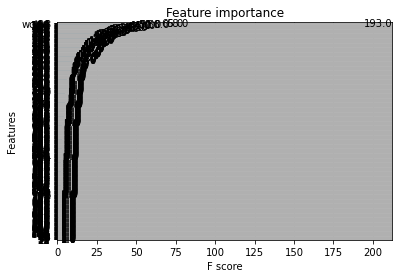

In [94]:
xgb.plot_importance(xgmodel)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()